# Solución 

In [2]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open('pubmed_abc_results.txt',"r", encoding='utf-8-sig') as f:
    data = f.read()

data = re.sub(r'\n\s{6}', ' ', data)

dat = re.findall (r"\,\s[A-Z]+[A-z]{2,11}\.", data)
unique_dat = list(set(dat))
unique_dat.sort ()


unique_dat.remove(", CUR.")
unique_dat.remove(", Bldg.")
unique_dat.remove(", Inc.")
unique_dat.remove(", Apdo.")
unique_dat.remove(", Mor.")
unique_dat.remove(", Weinheim.")
unique_dat.remove(", Connecticut.")
unique_dat.remove(", Brasil.")
unique_dat.remove(", California.")
unique_dat.remove(", Spemannstr.")

a = "".join(unique_dat)
b = a.split(", ")
c = "".join(b)
d = c.split(".")
d.remove("")
print("El listado es: ", d)

El listado es:  ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'China', 'Comatose', 'Croatia', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kentucky', 'Kenya', 'Mexico', 'Mozambique', 'Nairobi', 'Palestine', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'USA', 'Uganda', 'Venezuela']


In [61]:
len (d)


41

In [7]:
ubicacion = pd.read_csv('Paises_ubicacion.csv', engine='python', skipfooter=3)
ubicacion.head(5)


,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [8]:
ubicacion = ubicacion[ubicacion.name.isin(d)]
ubicacion.head(41)


,country,latitude,longitude,name
10,AR,-38.416097,-63.616672,Argentina
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
19,BE,50.503887,4.469936,Belgium
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
40,CH,46.818188,8.227512,Switzerland
44,CM,7.369722,12.354722,Cameroon
45,CN,35.861660,104.195397,China
53,DE,51.165691,10.451526,Germany


In [9]:
mapa=pd.concat([ubicacion]).drop_duplicates().sort_values('name')

AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

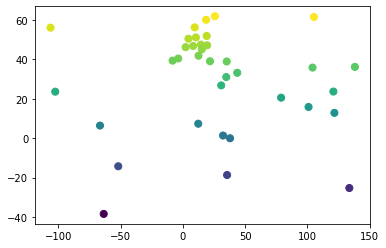

In [35]:
plt.scatter(mapa.longitude, mapa.latitude, s=50, c=mapa.latitude)

ard = dict(arrowstyle="->")


plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard,color = 'tab:purple')
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard, color = 'tab:orange')
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard, color = 'tab:blue')
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard, color = 'tab:green')
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard, color = 'tab:red')

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[0] * 3) )
